# Theme of this notebook - theories of forex trading (2) - GDP per capita Approach
* This is a memo for one of the theiries for forex trading - GDP per capita Approach

# What is GDP per capita Approach?
* GDP per capita Approach is one of the theories to forecast the theoretical prices of a target currency.
* The theory indicates that the theoretical price is correlated to some extent by the ratio of GDP per capita between two countries.
* The formula is as follows.<br>
<b>Theoretical price of currency</b> ∝ $\frac{GDP \ per \ capita \ of \ the \ base \ country}{GDP \ per \ capita \ of \ the \ target \ country} $
* Let's estimate the correlation between the ratio of GDP per capita between USA and JPN the actual price of USD/JPY as an example.

In [63]:
# First, import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import yfinance as yf

In [72]:
# Retrive USD-JPY Yahoo Finance data from 2010M1 to 2023M12 on a monthly basis
usdjpy = yf.download('JPY=X', start='2010-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [74]:
# Create DataFrame
usdjpy = pd.DataFrame(usdjpy.loc['2010-01-01':'2023-12-31', 'Adj Close'])

* Then, let's estimate the correlation coefficient between GDP per capita and the actual prices.
* Data source of GDP per capita created by International Monetary Fund is as follows.<br>
[International Monetary Fund]<br>
https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD

In [75]:
# In this case, used pre-processed data
imf = pd.read_csv("fin-008-1_imf-data.csv")

In [76]:
# Calculate monetary base theoretical prices
imf['GDP_per_capita_ratio'] = imf.iloc[:,2] / imf.iloc[:,1]
imf = imf[imf['GDP per capita, current prices\n (U.S. dollars per capita)']<2024]

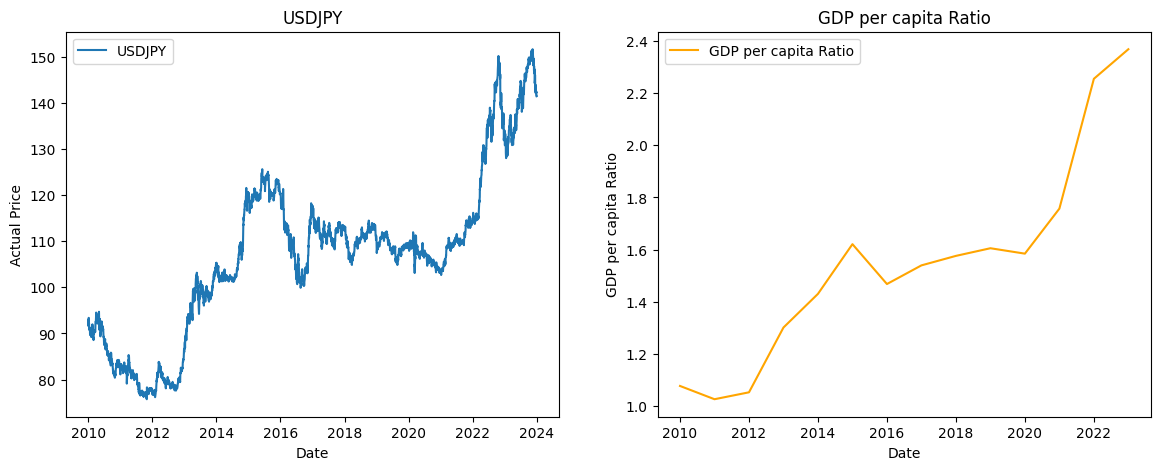

In [77]:
# Vidualize actual prices and GDP per capita ratio by using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot USDJPY on the first subplot
axs[0].plot(usdjpy['Adj Close'], label="USDJPY")
axs[0].set_title('USDJPY')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Actual Price')
axs[0].legend()

# Plot GDP per capita ratio on the second subplot
axs[1].plot(imf['GDP per capita, current prices\n (U.S. dollars per capita)'], imf['GDP_per_capita_ratio'], label="GDP per capita Ratio", color='orange')
axs[1].set_title('GDP per capita Ratio')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('GDP per capita Ratio')
axs[1].legend()

plt.show()

### ↑Somewhat similar, right?
* I also created graphs comparing yearly average USDJPY rate with GDP per capita ratio.
* You can get yearly average currency exchange rate from the following website.<br>
https://www.ofx.com/en-us/forex-news/historical-exchange-rates/yearly-average-rates/

In [80]:
# In this case, used pre-processed data
yearly = pd.read_csv("fin-008-2_yearly_average_currency_rate(USDJPY).csv")
yearly = yearly[yearly['Date'] >= 2010]

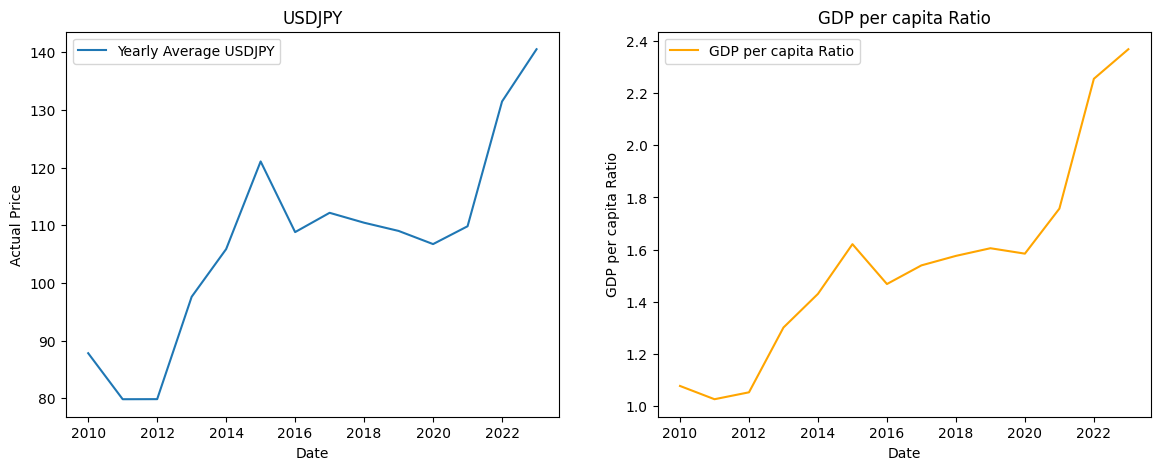

In [82]:
# Vidualize actual prices and GDP per capita ratio by using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot yearly average USDJPY on the first subplot
axs[0].plot(yearly['Date'], yearly['Yearly Average Currency Rate'], label="Yearly Average USDJPY")
axs[0].set_title('USDJPY')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Actual Price')
axs[0].legend()

# Plot GDP per capita ratio on the second subplot
axs[1].plot(imf['GDP per capita, current prices\n (U.S. dollars per capita)'], imf['GDP_per_capita_ratio'], label="GDP per capita Ratio", color='orange')
axs[1].set_title('GDP per capita Ratio')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('GDP per capita Ratio')
axs[1].legend()

plt.show()

# Check R-squared values

In [83]:
# Set dependent and independent variable
yearly_usdjpy = yearly['Yearly Average Currency Rate'].values
GDP_per_capita = imf['GDP_per_capita_ratio'].values

# Set intercept to forecast beta by using statsmodel
GDP_per_capita = sm.add_constant(GDP_per_capita)

# Build a simple linear regression model
model = sm.OLS(yearly_usdjpy,GDP_per_capita)
result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     128.7
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           9.04e-08
Time:                        04:56:20   Log-Likelihood:                -42.053
No. Observations:                  14   AIC:                             88.11
Df Residuals:                      12   BIC:                             89.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.6355      5.864      7.270      0.000      29.858      55.413
x1            41.7403      3.680     11.343      0.000      33.722      49.758
==============================================================================
Omnibus:                        0.737   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.545
Skew:                           0.430   Prob(JB):                        0.761
Kurtosis:                       2.557   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The meaning of the model
* The model is as follows:<br>
$E(S_{¥})$ = 42.6355 + 41.7403*$\frac{GDP_{USA}}{GDP_{JPN}}$
<br>
Where, $S_{¥}$ = the yearly average price of yen, $GDP_{USA}$ = GDP per capita of USA, $GDP_{JPN}$ = GDP per capita of Japan.<br>
* The R-squared value of the model is about 91.5%, meaning this model can explain about 91.5% of the change of yearly average price of yen during 2010-2023. Pretty high R-squared value!
* Note: This forcasting model was created by using data from 2010-2023. Therefore, if the time-series data as train data are changed, the R-squared value of the model are also changed.

# Conclusion
* Python enables us to beautifully describe the relationship between forex prices and GDP per capita of specific countries.
* The correlation coefficient of forex prices and GDP per capita ratio between two countries seems to be high (at least in terms of USDJPY)